In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, accuracy_score)

%matplotlib inline

In [2]:
df = pd.read_csv('EDA-N.csv', index_col=0)

In [3]:
df.head()

,outcome,days_in_shelter,age_in_days,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,...,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,1,6,101,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,20,1116,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,18,129,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
3,1,18,129,1,0,0,1,1,1,0,...,0,1,1,1,0,1,0,0,0,0
4,1,1,398,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(15281, 21)

In [5]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_s)[:, 1] >= threshold)
    outcome_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(outcome_confusion, cmap=plt.cm.Blues, annot=True, 
                square=True, fmt='d',
           xticklabels=['no home', 'home'],
           yticklabels=['no home', 'home']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

# 2 features 

In [6]:
X = df.loc[:,['days_in_shelter', 'age_in_days']]
y = df.outcome

In [7]:
X

,days_in_shelter,age_in_days
0,6,101
1,20,1116
2,18,129
3,18,129
4,1,398
...,...,...
15276,29,2192
15277,42,73
15278,13,378
15279,16,715


In [8]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15276    1
15277    1
15278    0
15279    1
15280    0
Name: outcome, Length: 15281, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [10]:
std = StandardScaler()
X_train_s = std.fit_transform(X_train)
X_test_s = std.transform(X_test)

lm = LogisticRegression()
lm.fit(X_train_s, y_train)

lm_ac = lm.score(X_test_s, y_test)
lm_pred = lm.predict(X_test_s)
lm_pre = precision_score(y_test, lm_pred)
lm_re = recall_score(y_test, lm_pred)
lm_f1 = f1_score(y_test, lm_pred)

lm_fpr, lm_tpr, lm_thresholds = roc_curve(y_test, lm.predict_proba(X_test_s)[:,1])
lm_auc = roc_auc_score(y_test, lm.predict_proba(X_test_s)[:,1])

print('Logistic regression metrics with 2 features (validation):' + '\n' 
      f'  Accuracy:{lm_ac: .3f}' + '\n'
      f'  Precision:{lm_pre: .3f}' + '\n'
      f'  Recall:{lm_re: .3f}' + '\n'
      f'  F1:{lm_f1: .3f}' + '\n'
      f'  ROC AUC:{lm_auc: .3f}')

Logistic regression metrics with 2 features (validation):
  Accuracy: 0.746
  Precision: 0.746
  Recall: 0.998
  F1: 0.854
  ROC AUC: 0.608


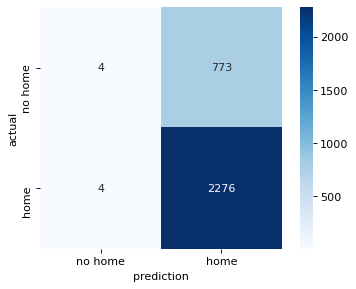

In [11]:
make_confusion_matrix(lm)

# 7 features 

In [12]:
df.head()

,outcome,days_in_shelter,age_in_days,name_yes,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,...,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,1,6,101,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,20,1116,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,18,129,1,0,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
3,1,18,129,1,0,0,1,1,1,0,...,0,1,1,1,0,1,0,0,0,0
4,1,1,398,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
X = df.iloc[:, [1, 2, 4, 5, 6, 7, 8]]
y = df.outcome

In [14]:
X

,days_in_shelter,age_in_days,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes
0,6,101,0,0,1,0,1
1,20,1116,0,0,1,0,1
2,18,129,0,0,1,0,1
3,18,129,0,0,1,1,1
4,1,398,1,0,0,1,1
...,...,...,...,...,...,...,...
15276,29,2192,1,0,1,1,0
15277,42,73,0,0,1,0,1
15278,13,378,1,0,0,1,0
15279,16,715,1,0,0,1,1


In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15276    1
15277    1
15278    0
15279    1
15280    0
Name: outcome, Length: 15281, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

std = StandardScaler()
X_train_s = std.fit_transform(X_train)
X_test_s = std.transform(X_test)

lm2 = LogisticRegression()
lm2.fit(X_train_s, y_train)

lm2_ac = lm2.score(X_test_s, y_test)
lm2_pred = lm2.predict(X_test_s)
lm2_pre = precision_score(y_test, lm2_pred)
lm2_re = recall_score(y_test, lm2_pred)
lm2_f1 = f1_score(y_test, lm2_pred)

lm2_fpr, lm2_tpr, lm2_thresholds = roc_curve(y_test, lm2.predict_proba(X_test_s)[:,1])
lm2_auc = roc_auc_score(y_test, lm2.predict_proba(X_test_s)[:,1])

print('Logistic Regression metrics with 4 features:' + '\n' 
      f'  Accuracy:{lm2_ac: .3f}' + '\n'
      f'  Precision:{lm2_pre: .3f}' + '\n'
      f'  Recall:{lm2_re: .3f}' + '\n'
      f'  F1:{lm2_f1: .3f}' + '\n'
      f'  ROC AUC:{lm2_auc: .3f}')

Logistic Regression metrics with 4 features:
  Accuracy: 0.779
  Precision: 0.790
  Recall: 0.959
  F1: 0.866
  ROC AUC: 0.749


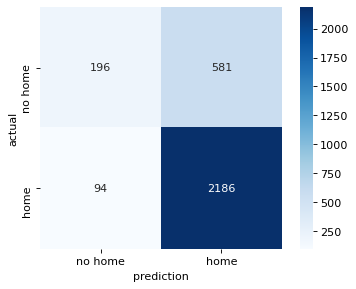

In [17]:
make_confusion_matrix(lm2)

# All features 

In [18]:
X = df.drop(['outcome', 'name_yes'], axis=1)
y = df.outcome

In [19]:
X

,days_in_shelter,age_in_days,type_DOG,type_OTHER,breed_pure,color_single,gonadectomy_yes,size_MED,size_SMALL,size_X-LRG,size_X_SMALL,intake_type_STRAY,outcome_condition_positive,outcome_day_of_week_1,outcome_day_of_week_2,outcome_day_of_week_3,outcome_day_of_week_4,outcome_day_of_week_5,outcome_day_of_week_6
0,6,101,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,20,1116,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
2,18,129,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
3,18,129,0,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0
4,1,398,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15276,29,2192,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0
15277,42,73,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
15278,13,378,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0
15279,16,715,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0


In [20]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15276    1
15277    1
15278    0
15279    1
15280    0
Name: outcome, Length: 15281, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

std = StandardScaler()
X_train_s = std.fit_transform(X_train)
X_test_s = std.transform(X_test)

lm3 = LogisticRegression(max_iter=10000)
lm3.fit(X_train_s, y_train)

lm3_ac = lm3.score(X_test_s, y_test)
lm3_pred = lm3.predict(X_test_s)
lm3_pre = precision_score(y_test, lm3_pred)
lm3_re = recall_score(y_test, lm3_pred)
lm3_f1 = f1_score(y_test, lm3_pred)

lm3_fpr, lm3_tpr, lm3_thresholds = roc_curve(y_test, lm3.predict_proba(X_test_s)[:,1])
lm3_auc = roc_auc_score(y_test, lm3.predict_proba(X_test_s)[:,1])

print('Logistic Regression metrics with all features:' + '\n' 
      f'  Accuracy:{lm3_ac: .3f}' + '\n'
      f'  Precision:{lm3_pre: .3f}' + '\n'
      f'  Recall:{lm3_re: .3f}' + '\n'
      f'  F1:{lm3_f1: .3f}' + '\n'
      f'  ROC AUC:{lm3_auc: .3f}')

Logistic Regression metrics with all features:
  Accuracy: 0.795
  Precision: 0.820
  Recall: 0.929
  F1: 0.871
  ROC AUC: 0.815


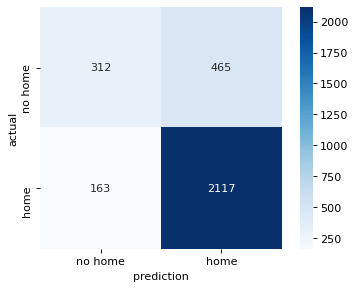

In [22]:
make_confusion_matrix(lm3)

## ROC Curves

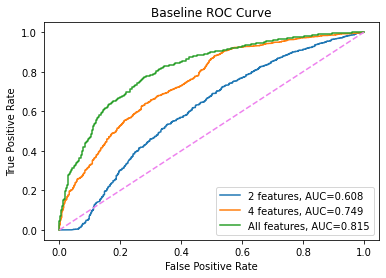

In [23]:
plt.plot(lm_fpr, lm_tpr, label = '2 features, AUC=%.3f' %lm_auc)
plt.plot(lm2_fpr, lm2_tpr, label = '4 features, AUC=%.3f' %lm2_auc)
plt.plot(lm3_fpr, lm3_tpr, label = 'All features, AUC=%.3f' %lm3_auc)
plt.plot([0,1], [0,1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline ROC Curve')
plt.legend(loc='lower right')

plt.savefig('Baseline ROC Curve')